<a href="https://colab.research.google.com/github/annesantos1990/relative_risk_project/blob/main/Projeto_Risco_Relativo_Eslaine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Avaliação do Risco de Indimplência dos clientes de um Banco**

Nesse projeto, estarei fazendo a análise e Classificação do risco de crédito dos clientes do banco "A caja".

## **Importando os dados do Big Query**

Primeiramente, vou carregar meus dados do Big Query:

In [ ]:
!pip install google-cloud-bigquery

In [ ]:
#autenticando a conta
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
from google.cloud import bigquery

proj3 = 'expanded-flame-423403-n5'
client = bigquery.Client(project = proj3)

In [ ]:
#criando a consulta
query = """
  SELECT *
  FROM `expanded-flame-423403-n5.dados_proj3.proj3_unified_table2`
"""

Importação do pandas para carregar os dados do bigquery em um dataframe:

In [ ]:
import pandas as pd

df = client.query(query).to_dataframe()

df.head()


user_id  age sex  last_month  number_dependents        loan_types  \
0    11659   25   F      5400.0                0.0             OTHER   
1     7916   34   F      5400.0                0.0             OTHER   
2    26751   39   M      5400.0                0.0  REAL STATE,OTHER   
3    32441   54   F      5400.0                0.0  REAL STATE,OTHER   
4    13139   55   F      5400.0                0.0  REAL STATE,OTHER   

   total_loan  default_flag  total_90_days_overdue  total_lines  debt_ratio  
0           3             0                      0     0.091184         9.0  
1           7             0                      0     0.015510       106.0  
2           4             0                      0     0.000000      3283.0  
3           2             0                      0     0.040736      1152.0  
4           5             0                      0     0.158356      1701.0

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35575 entries, 0 to 35574
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                35575 non-null  Int64  
 1   age                    35575 non-null  Int64  
 2   sex                    35575 non-null  object 
 3   last_month             35575 non-null  float64
 4   number_dependents      35575 non-null  float64
 5   loan_types             35575 non-null  object 
 6   total_loan             35575 non-null  Int64  
 7   default_flag           35575 non-null  Int64  
 8   total_90_days_overdue  35575 non-null  Int64  
 9   total_lines            35575 non-null  float64
 10  debt_ratio             35575 non-null  float64
dtypes: Int64(5), float64(4), object(2)
memory usage: 3.2+ MB
None


## **Importando a tabela risk_classification**

In [ ]:
#criando a consulta
classf = """
  SELECT *
  FROM `expanded-flame-423403-n5.dados_proj3.risk_classification`
"""

import pandas as pd

df3 = client.query(classf).to_dataframe()
df3.head()

user_id  default_flag  age_relative_risk  age_quartiles  lower_age  \
0    34909             0           2.256253              1         21   
1     6021             1           2.256253              1         21   
2     9382             0           1.369972              2         42   
3    12043             0           2.256253              1         21   
4     8515             1           2.256253              1         21   

   upper_age  age_risk_dummy  last_month_relative_risk  last_month_quartiles  \
0         42               1                  1.949529                     1   
1         42               1                  1.949529                     1   
2         52               1                  1.949529                     1   
3         42               1                  1.949529                     1   
4         42               1                  1.949529                     1   

   lower_last_month  ...  total_lines_risk_dummy  debt_ratio_relative_risk  \
0               0.0  ...                       1                  1.453406   
1               0.0  ...                       1                  1.047840   
2               0.0  ...                       1                  1.453406   
3               0.0  ...                       1                  1.047840   
4               0.0  ...                       1                  1.453406   

   debt_ratio_quartiles  lower_debt_ratio  upper_debt_ratio  \
0                     3          0.369279          0.881272   
1                     4          0.881365     307001.000000   
2                     3          0.369279          0.881272   
3                     4          0.881365     307001.000000   
4                     3          0.369279          0.881272   

   debt_ratio_risk_dummy  risk_score  risk_score_1  default_rate   risk_class  
0                      1           7             7      0.310345  Mau Pagador  
1                      1           7             7      0.310345  Mau Pagador  
2                      1           7             7      0.310345  Mau Pagador  
3                      1           7             7      0.310345  Mau Pagador  
4                      1           7             7      0.310345  Mau Pagador  

[5 rows x 41 columns]

## **Tratamento dos dados e Análise Exploratória**

Nessa etapa, irei analisar os outliers das variáveis numéricas para verificar se tem algum valor discrepante:

### Gráficos - *Outliers*

In [ ]:
import plotly.express as px

fig = px.box(df, x="age", color_discrete_sequence=['#AB1B01'], template='seaborn')
fig.show()

fig2 = px.box(df, x="last_month", color_discrete_sequence=['#AB1B01'], template='seaborn')
fig2.show()

fig3 = px.box(df, x="number_dependents", color_discrete_sequence=['#AB1B01'], template = 'seaborn')
fig3.show()

fig4 = px.box(df, x="total_loan", color_discrete_sequence=['#AB1B01'], template='seaborn')
fig4.show()

fig5 = px.box(df, x="total_90_days_overdue", color_discrete_sequence=['#AB1B01'], template='seaborn')
fig5.show()

fig6 = px.box(df, x="total_lines", color_discrete_sequence=['#AB1B01'], template = 'seaborn')
fig6.show()

fig7 = px.box(df, x="debt_ratio", color_discrete_sequence=['#AB1B01'], template='seaborn')
fig7.show()

Ao longo do projeto, nao vi a necessidade da remoção de outliers, pois vi que eles são importantes para a análise e para o modelo.

---





In [ ]:
df.describe()

user_id        age    last_month  number_dependents  total_loan  \
count       35575.0    35575.0  3.557500e+04       35575.000000     35575.0   
mean   18005.569895  52.534223  6.447037e+03           0.741391    8.582853   
std    10393.562002  14.738055  1.166701e+04           1.112101    5.127896   
min             1.0       21.0  0.000000e+00           0.000000         1.0   
25%          9007.5       42.0  3.945500e+03           0.000000         5.0   
50%         18002.0       52.0  5.400000e+03           0.000000         8.0   
75%         27005.5       63.0  7.494500e+03           1.000000        11.0   
max         35999.0      109.0  1.560100e+06          13.000000        57.0   

       default_flag  total_90_days_overdue   total_lines     debt_ratio  
count       35575.0                35575.0  35575.000000   35575.000000  
mean       0.017484               0.088545      5.864444     355.538336  
std        0.131069               0.715408    224.737076    2023.263177  
min             0.0                    0.0      0.000000       0.000000  
25%             0.0                    0.0      0.028830       0.181114  
50%             0.0                    0.0      0.144361       0.369246  
75%             0.0                    0.0      0.529235       0.880777  
max             1.0                   98.0  22000.000000  307001.000000

### Gráficos de barra - Default Flag

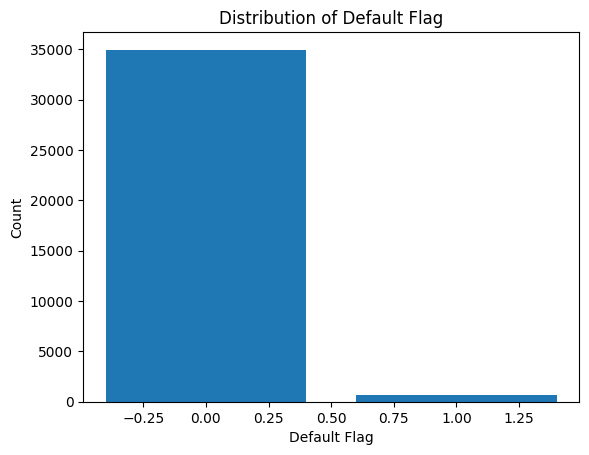

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#calculando a quantidade de cada default_flag
default_counts = df['default_flag'].value_counts()

# Gráfico de barras
plt.bar(default_counts.index, default_counts.values)
plt.xlabel('Default Flag')
plt.ylabel('Count')
plt.title('Distribution of Default Flag')
plt.show()

### **Correlações**

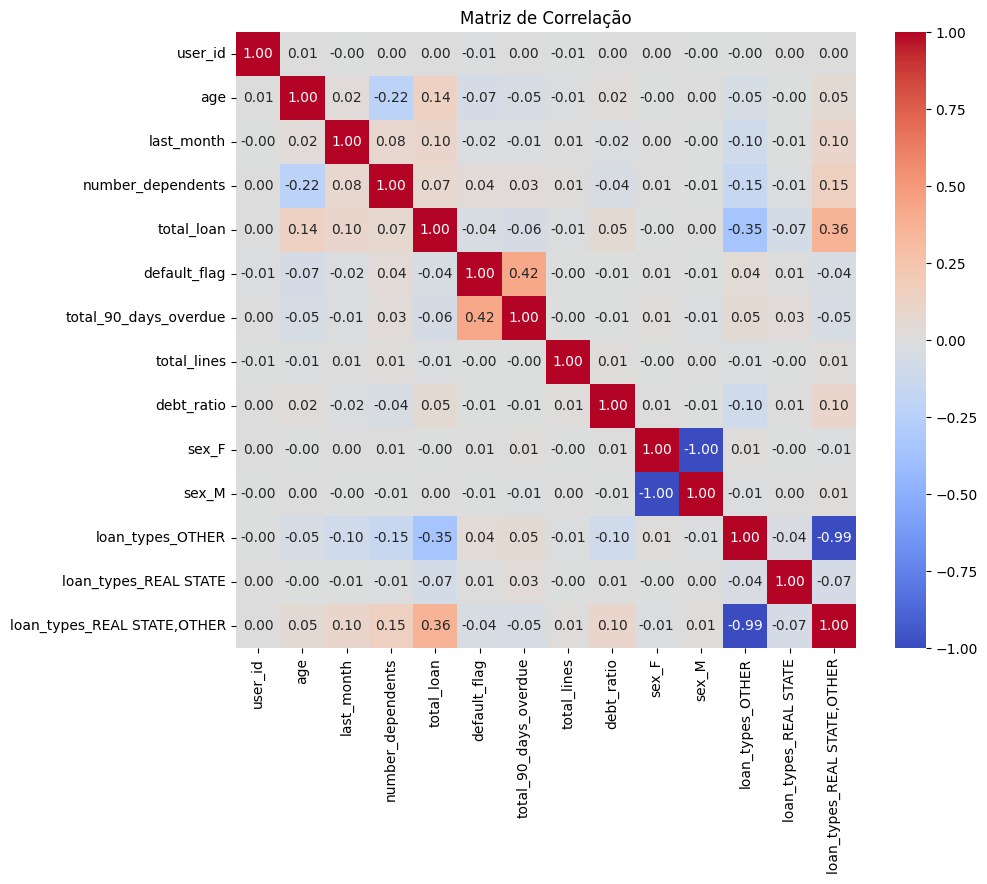

In [ ]:
# Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Converter variáveis categóricas em variáveis dummy
df = pd.get_dummies(df)

# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


In [ ]:
correlation_matrix = df.corr()

df.corr()

user_id       age  last_month  \
user_id                      1.000000  0.005795   -0.001990   
age                          0.005795  1.000000    0.023680   
last_month                  -0.001990  0.023680    1.000000   
number_dependents            0.000457 -0.222629    0.081637   
total_loan                   0.002889  0.135582    0.096789   
default_flag                -0.008973 -0.069564   -0.018240   
total_90_days_overdue        0.001827 -0.051340   -0.013363   
total_lines                 -0.006719 -0.007828    0.006338   
debt_ratio                   0.000386  0.019604   -0.020522   
sex_F                        0.000641 -0.000425    0.003745   
sex_M                       -0.000641  0.000425   -0.003745   
loan_types_OTHER            -0.000263 -0.047168   -0.095847   
loan_types_REAL STATE        0.000023 -0.003230   -0.006286   
loan_types_REAL STATE,OTHER  0.000260  0.047437    0.096365   

                             number_dependents  total_loan  default_flag  \
user_id                               0.000457    0.002889     -0.008973   
age                                  -0.222629    0.135582     -0.069564   
last_month                            0.081637    0.096789     -0.018240   
number_dependents                     1.000000    0.070732      0.036807   
total_loan                            0.070732    1.000000     -0.042892   
default_flag                          0.036807   -0.042892      1.000000   
total_90_days_overdue                 0.028923   -0.060396      0.424478   
total_lines                           0.008468   -0.014782     -0.002824   
debt_ratio                           -0.040051    0.054192     -0.006031   
sex_F                                 0.007663   -0.003661      0.006639   
sex_M                                -0.007663    0.003661     -0.006639   
loan_types_OTHER                     -0.152942   -0.353996      0.043841   
loan_types_REAL STATE                -0.008919   -0.071854      0.006090   
loan_types_REAL STATE,OTHER           0.153654    0.360968     -0.044412   

                             total_90_days_overdue  total_lines  debt_ratio  \
user_id                                   0.001827    -0.006719    0.000386   
age                                      -0.051340    -0.007828    0.019604   
last_month                               -0.013363     0.006338   -0.020522   
number_dependents                         0.028923     0.008468   -0.040051   
total_loan                               -0.060396    -0.014782    0.054192   
default_flag                              0.424478    -0.002824   -0.006031   
total_90_days_overdue                     1.000000    -0.002675   -0.006475   
total_lines                              -0.002675     1.000000    0.014972   
debt_ratio                               -0.006475     0.014972    1.000000   
sex_F                                     0.011134    -0.000057    0.006012   
sex_M                                    -0.011134     0.000057   -0.006012   
loan_types_OTHER                          0.047347    -0.012093   -0.100649   
loan_types_REAL STATE                     0.027401    -0.001087    0.007782   
loan_types_REAL STATE,OTHER              -0.050129     0.012189    0.099698   

                                sex_F     sex_M  loan_types_OTHER  \
user_id                      0.000641 -0.000641         -0.000263   
age                         -0.000425  0.000425         -0.047168   
last_month                   0.003745 -0.003745         -0.095847   
number_dependents            0.007663 -0.007663         -0.152942   
total_loan                  -0.003661  0.003661         -0.353996   
default_flag                 0.006639 -0.006639          0.043841   
total_90_days_overdue        0.011134 -0.011134          0.047347   
total_lines                 -0.000057  0.000057         -0.012093   
debt_ratio                   0.006012 -0.006012         -0.100649   
sex_F                        1.000000 -1.000000          0.011139  

## **Matriz de confusão - Modelo de de Classificação baseada no risco relativo**

A matriz de confusão será utilizada com o propósito de verificar se a classificação feita através das sete variáveis selecionas (age | last_month_salary | number_dependents | total_loan | total_90_days_overdue | using lines not secured personal assets | debt_ratio), é um bom modelo de classificação.

In [ ]:
df3

user_id  default_flag  age_relative_risk  age_quartiles  lower_age  \
0        34909             0           2.256253              1         21   
1         6021             1           2.256253              1         21   
2         9382             0           1.369972              2         42   
3        12043             0           2.256253              1         21   
4         8515             1           2.256253              1         21   
...        ...           ...                ...            ...        ...   
35570     4312             0           0.644507              3         52   
35571    17343             0           0.262267              4         63   
35572    16798             0           0.262267              4         63   
35573    11272             0           0.644507              3         52   
35574    26936             0           0.644507              3         52   

       upper_age  age_risk_dummy  last_month_relative_risk  \
0             42               1                  1.949529   
1             42               1                  1.949529   
2             52               1                  1.949529   
3             42               1                  1.949529   
4             42               1                  1.949529   
...          ...             ...                       ...   
35570         63               0                  0.392771   
35571        109               0                  0.987142   
35572        109               0                  0.961747   
35573         63               0                  0.392771   
35574         63               0                  0.987142   

       last_month_quartiles  lower_last_month  ...  total_lines_risk_dummy  \
0                         1               0.0  ...                       1   
1                         1               0.0  ...                       1   
2                         1               0.0  ...                       1   
3                         1               0.0  ...                       1   
4                         1               0.0  ...                       1   
...                     ...               ...  ...                     ...   
35570                     4            7495.0  ...                       0   
35571                     3            5400.0  ...                       0   
35572                     2            3947.0  ...                       0   
35573                     4            7495.0  ...                       0   
35574                     3            5400.0  ...                       0   

       debt_ratio_relative_risk  debt_ratio_quartiles  lower_debt_ratio  \
0                      1.453406                     3          0.369279   
1                      1.047840                     4          0.881365   
2                      1.453406                     3          0.369279   
3                      1.047840                     4          0.881365   
4                      1.453406                     3          0.369279   
...                         ...                   ...               ...   
35570                  0.823740                     2          0.181122   
35571                  0.823740                     2          0.181122   
35572                  0.823740                     2          0.181122   
35573                  0.823740                     2          0.181122   
35574                  0.823740                     2          0.181122   

       upper_debt_ratio  debt_ratio_risk_dummy  risk_score  risk_score_1  \
0              0.881272                      1           7             7   
1         307001.000000                      1           7             7   
2              0.881272                      1           7             7   
3         307001.000000                      1           7             7   
4              0.881272                      1           7             7   
...                 ...                    

**Definindo a variável com os valores previstos:**

A variável *risk_class*, classifica em "Bom pagador" e "Mau pagador", os clientes de acordo com a pontuação obtida através do risco relativo. Para mais detalhes, acesse esse link:

Aqui, essa variável será reclassificada em 1 (para Mau Pagador) e 0 (para Bom pagador).

Essa nova variável (*predicted_default*), será comparada com a variável default_flag para avaliação do meu modelo de classificação

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Definir o ponto de corte e calcular a coluna 'predicted_default'
df3['predicted_default'] = df3['risk_class'].apply(lambda x: 1 if x == "Mau Pagador" else 0)

df3


user_id  default_flag  age_relative_risk  age_quartiles  lower_age  \
0        34909             0           2.256253              1         21   
1         6021             1           2.256253              1         21   
2         9382             0           1.369972              2         42   
3        12043             0           2.256253              1         21   
4         8515             1           2.256253              1         21   
...        ...           ...                ...            ...        ...   
35570     4312             0           0.644507              3         52   
35571    17343             0           0.262267              4         63   
35572    16798             0           0.262267              4         63   
35573    11272             0           0.644507              3         52   
35574    26936             0           0.644507              3         52   

       upper_age  age_risk_dummy  last_month_relative_risk  \
0             42               1                  1.949529   
1             42               1                  1.949529   
2             52               1                  1.949529   
3             42               1                  1.949529   
4             42               1                  1.949529   
...          ...             ...                       ...   
35570         63               0                  0.392771   
35571        109               0                  0.987142   
35572        109               0                  0.961747   
35573         63               0                  0.392771   
35574         63               0                  0.987142   

       last_month_quartiles  lower_last_month  ...  debt_ratio_relative_risk  \
0                         1               0.0  ...                  1.453406   
1                         1               0.0  ...                  1.047840   
2                         1               0.0  ...                  1.453406   
3                         1               0.0  ...                  1.047840   
4                         1               0.0  ...                  1.453406   
...                     ...               ...  ...                       ...   
35570                     4            7495.0  ...                  0.823740   
35571                     3            5400.0  ...                  0.823740   
35572                     2            3947.0  ...                  0.823740   
35573                     4            7495.0  ...                  0.823740   
35574                     3            5400.0  ...                  0.823740   

       debt_ratio_quartiles  lower_debt_ratio  upper_debt_ratio  \
0                         3          0.369279          0.881272   
1                         4          0.881365     307001.000000   
2                         3          0.369279          0.881272   
3                         4          0.881365     307001.000000   
4                         3          0.369279          0.881272   
...                     ...               ...               ...   
35570                     2          0.181122          0.369246   
35571                     2          0.181122          0.369246   
35572                     2          0.181122          0.369246   
35573                     2          0.181122          0.369246   
35574                     2          0.181122          0.369246   

       debt_ratio_risk_dummy  risk_score  risk_score_1  default_rate  \
0                          1           7             7      0.310345   
1                          1           7             7      0.310345   
2                          1           7             7      0.310345   
3                          1           7             7      0.310345   
4                          1           7             7      0.310345   
...                      ...         ...           ...           ...   
35570                      0           0             0      0.00000

**Variável real e preditiva:**
* Aqui default_flag é a variável real, pois ela já nos traz a informação se um cliente é inadimplente ou adimplente;
* E temos o nosso modelo que é a variável "predicted_default"

Matriz de Confusão:
[[33968   985]
 [  599    23]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98     34953
         1.0       0.02      0.04      0.03       622

    accuracy                           0.96     35575
   macro avg       0.50      0.50      0.50     35575
weighted avg       0.97      0.96      0.96     35575



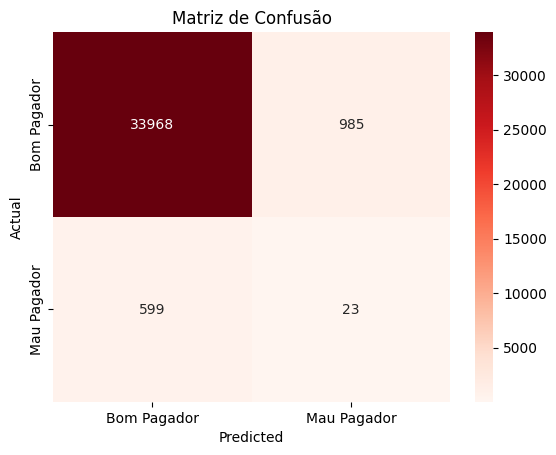

In [ ]:
# Variável real e predita
# Aqui default_flag é a variável real, pois ela já nos traz a informação se um cliente é inadimplente ou adimplente
# E temos o nosso modelo que é a variável "predicted_default"
y_true = df['default_flag']
y_pred = df3['predicted_default']

# Matriz de confusão para avaliar se meu modelo com a nova variável "predicted_default" é um bom modelo.
conf_matrix = confusion_matrix(y_true, y_pred)

# Relatório de classificação
class_report = classification_report(y_true, y_pred)

print("Matriz de Confusão:")
print(conf_matrix)
print("\nRelatório de Classificação:")
print(class_report)


# Visualizar a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Bom Pagador', 'Mau Pagador'], yticklabels=['Bom Pagador', 'Mau Pagador'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão')
plt.show()

A matriz de confusão mostra que para Bons pagadores, o modelo tem alto nível de precisão, porém para mal pagador, tem baixo nível de precisão e recall.

Uma possível explicação, deve ser por conta do default_flag apresentar valores desbalanceados.

Assim, será feito um processo de "balanceamento" dos dados desse modelo.

Primeiramente, vamos analisar a variável default_flag:

## Gráficos Bivariados

No gráfico boxplot abaixo, será avaliado a diferença entre os grupos de Bons e Maus pagadores da classificação feita através dos Scores com a variável default_flag.

**Combinando os Data_Frames**

In [ ]:
# Combinar os DataFrames usando 'user_id' como chave
df_combined = pd.merge(df, df3, on='user_id')

# Exibir o DataFrame combinado
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35575 entries, 0 to 35574
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   user_id                              35575 non-null  Int64  
 1   age                                  35575 non-null  Int64  
 2   last_month                           35575 non-null  float64
 3   number_dependents                    35575 non-null  float64
 4   total_loan                           35575 non-null  Int64  
 5   default_flag_x                       35575 non-null  Int64  
 6   total_90_days_overdue                35575 non-null  Int64  
 7   total_lines                          35575 non-null  float64
 8   debt_ratio                           35575 non-null  float64
 9   sex_F                                35575 non-null  bool   
 10  sex_M                                35575 non-null  bool   
 11  loan_types_OTHER            

### **age**

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criar subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Default_flag', 'Risk_classification'))

# Box plot para 'age' categorizado por 'risk_class'
fig1 = px.box(df_combined, x="risk_class", y='age', title='Box plot da variável age por risk_class', labels={'default_flag': 'Default Flag', 'age': 'Age'}, color_discrete_sequence=['#AB1B01'],points='all')
for trace in fig1['data']:
    fig.add_trace(trace, row=1, col=2)

# Box plot para 'default_flag'
fig2 = px.box(df_combined, x="default_flag_x", y='age', title='Box plot da variável default_flag', labels={'default_flag': 'Default Flag', 'age': 'Age'}, color_discrete_sequence=['#FDA600'], points='all')
for trace in fig2['data']:
    fig.add_trace(trace, row=1, col=1)

 # Atualizar layout para adicionar nomes aos eixos
fig.update_xaxes(title_text="Default Flag", row=1, col=1)
fig.update_yaxes(title_text="Age", row=1, col=1)

fig.update_xaxes(title_text="Risk_classification", row=1, col=2)
fig.update_yaxes(title_text="Age", row=1, col=2)

    # Atualizar layout
fig.update_layout(height=600, width=1200, showlegend=False)
fig.show()






### **last_month**

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criar subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Default_flag', 'Risk_classification'))

# Box plot para 'age' categorizado por 'risk_class'
fig1 = px.box(df_combined, x="risk_class", y='last_month', title='Box plot da variável age por risk_class', labels={'default_flag': 'Default Flag', 'last_month': 'Last_month'}, color_discrete_sequence=['#AB1B01'],points='all')
for trace in fig1['data']:
    fig.add_trace(trace, row=1, col=2)

# Box plot para 'default_flag'
fig2 = px.box(df_combined, x="default_flag_x", y='last_month', title='Box plot da variável default_flag', labels={'default_flag': 'Default Flag', 'last_month': 'Last_month'}, color_discrete_sequence=['#FDA600'], points='all')
for trace in fig2['data']:
    fig.add_trace(trace, row=1, col=1)

 # Atualizar layout para adicionar nomes aos eixos
fig.update_xaxes(title_text="Default Flag", row=1, col=1)
fig.update_yaxes(title_text="last_month", row=1, col=1)

fig.update_xaxes(title_text="Risk classification", row=1, col=2)
fig.update_yaxes(title_text="last_month", row=1, col=2)

    # Atualizar layout
fig.update_layout(height=600, width=1200, showlegend=False)
fig.show()

### **number_dependents**

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criar subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Default_flag', 'Risk_classification'))

# Box plot para 'age' categorizado por 'risk_class'
fig1 = px.box(df_combined, x="risk_class", y='number_dependents', title='Box plot da variável age por risk_class', labels={'default_flag': 'Default Flag', 'number_dependents': 'Number_dependents'}, color_discrete_sequence=['#AB1B01'],points='all')
for trace in fig1['data']:
    fig.add_trace(trace, row=1, col=2)

# Box plot para 'default_flag'
fig2 = px.box(df_combined, x="default_flag_x", y='number_dependents', title='Box plot da variável default_flag', labels={'default_flag': 'Default Flag', 'number_dependents': 'Number_dependents'}, color_discrete_sequence=['#FDA600'], points='all')
for trace in fig2['data']:
    fig.add_trace(trace, row=1, col=1)

 # Atualizar layout para adicionar nomes aos eixos
fig.update_xaxes(title_text="Default Flag", row=1, col=1)
fig.update_yaxes(title_text="number_dependents", row=1, col=1)

fig.update_xaxes(title_text="Risk Classification", row=1, col=2)
fig.update_yaxes(title_text="number_dependents", row=1, col=2)

    # Atualizar layout
fig.update_layout(height=600, width=1200, showlegend=False)
fig.show()

### **total_loan**

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criar subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Default_flag', 'Risk_classification'))

# Box plot para 'age' categorizado por 'risk_class'
fig1 = px.box(df_combined, x="risk_class", y='total_loan', title='Box plot da variável age por risk_class', labels={'default_flag': 'Default Flag', 'total_loan': 'total_loan'}, color_discrete_sequence=['#AB1B01'],points='all')
for trace in fig1['data']:
    fig.add_trace(trace, row=1, col=2)

# Box plot para 'default_flag'
fig2 = px.box(df_combined, x="default_flag_x", y='total_loan', title='Box plot da variável default_flag', labels={'default_flag': 'Default Flag', 'total_loan': 'total_loan'}, color_discrete_sequence=['#FDA600'], points='all')
for trace in fig2['data']:
    fig.add_trace(trace, row=1, col=1)

 # Atualizar layout para adicionar nomes aos eixos
fig.update_xaxes(title_text="Default Flag", row=1, col=1)
fig.update_yaxes(title_text="total_loan", row=1, col=1)

fig.update_xaxes(title_text="Risk Classification", row=1, col=2)
fig.update_yaxes(title_text="total_loan", row=1, col=2)

    # Atualizar layout
fig.update_layout(height=600, width=1200, showlegend=False)
fig.show()

### **total_90_days_overdue**

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criar subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Default_flag', 'Risk_classification'))

# Box plot para 'age' categorizado por 'risk_class'
fig1 = px.box(df_combined, x="risk_class", y='total_90_days_overdue', title='Box plot da variável age por risk_class', labels={'default_flag': 'Default Flag', 'total_90_days_overdue': 'total_90_days_overdue'}, color_discrete_sequence=['#AB1B01'],points='all')
for trace in fig1['data']:
    fig.add_trace(trace, row=1, col=2)

# Box plot para 'default_flag'
fig2 = px.box(df_combined, x="default_flag_x", y='total_90_days_overdue', title='Box plot da variável default_flag', labels={'default_flag': 'Default Flag', 'total_90_days_overdue': 'total_90_days_overdue'}, color_discrete_sequence=['#FDA600'], points='all')
for trace in fig2['data']:
    fig.add_trace(trace, row=1, col=1)

 # Atualizar layout para adicionar nomes aos eixos
fig.update_xaxes(title_text="Default Flag", row=1, col=1)
fig.update_yaxes(title_text="total_90_days_overdue", row=1, col=1)

fig.update_xaxes(title_text="Risk Classification", row=1, col=2)
fig.update_yaxes(title_text="total_90_days_overdue", row=1, col=2)

    # Atualizar layout
fig.update_layout(height=600, width=1200, showlegend=False)
fig.show()

### **total_lines**

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criar subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Default_flag', 'Risk_classification'))

# Box plot para 'age' categorizado por 'risk_class'
fig1 = px.box(df_combined, x="risk_class", y='total_lines', title='Box plot da variável age por risk_class', labels={'default_flag': 'Default Flag', 'total_lines': 'total_lines'}, color_discrete_sequence=['#AB1B01'],points='all')
for trace in fig1['data']:
    fig.add_trace(trace, row=1, col=2)

# Box plot para 'default_flag'
fig2 = px.box(df_combined, x="default_flag_x", y='total_lines', title='Box plot da variável default_flag', labels={'default_flag': 'Default Flag', 'total_lines': 'total_lines'}, color_discrete_sequence=['#FDA600'], points='all')
for trace in fig2['data']:
    fig.add_trace(trace, row=1, col=1)

 # Atualizar layout para adicionar nomes aos eixos
fig.update_xaxes(title_text="Default Flag", row=1, col=1)
fig.update_yaxes(title_text="total_lines", row=1, col=1)

fig.update_xaxes(title_text="Risk Classification", row=1, col=2)
fig.update_yaxes(title_text="total_lines", row=1, col=2)

    # Atualizar layout
fig.update_layout(height=600, width=1200, showlegend=False)
fig.show()

### **debt_ratio**

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criar subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Default_flag', 'Risk_classification'))

# Box plot para 'age' categorizado por 'risk_class'
fig1 = px.box(df_combined, x="risk_class", y='debt_ratio', title='Box plot da variável age por risk_class', labels={'default_flag': 'Default Flag', 'debt_ratio': 'debt_ratio'}, color_discrete_sequence=['#AB1B01'],points='all')
for trace in fig1['data']:
    fig.add_trace(trace, row=1, col=2)

# Box plot para 'default_flag'
fig2 = px.box(df_combined, x="default_flag_x", y='debt_ratio', title='Box plot da variável default_flag', labels={'default_flag': 'Default Flag', 'debt_ratio': 'debt_ratio'}, color_discrete_sequence=['#FDA600'], points='all')
for trace in fig2['data']:
    fig.add_trace(trace, row=1, col=1)

 # Atualizar layout para adicionar nomes aos eixos
fig.update_xaxes(title_text="Default Flag", row=1, col=1)
fig.update_yaxes(title_text="debt_ratio", row=1, col=1)

fig.update_xaxes(title_text="Risk Classification", row=1, col=2)
fig.update_yaxes(title_text="debt_ratio", row=1, col=2)

    # Atualizar layout
fig.update_layout(height=600, width=1200, showlegend=False)
fig.show()

## **Regressão logística**

A regressão logística está aqui como uma proposta de modelo alternativo ao anterior, já que o modelo de classificação baseada no risco relativo não apresentou boas métricas.

In [ ]:
df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35575 entries, 0 to 35574
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      35575 non-null  Int64  
 1   age                          35575 non-null  Int64  
 2   last_month                   35575 non-null  float64
 3   number_dependents            35575 non-null  float64
 4   total_loan                   35575 non-null  Int64  
 5   default_flag                 35575 non-null  Int64  
 6   total_90_days_overdue        35575 non-null  Int64  
 7   total_lines                  35575 non-null  float64
 8   debt_ratio                   35575 non-null  float64
 9   sex_F                        35575 non-null  bool   
 10  sex_M                        35575 non-null  bool   
 11  loan_types_OTHER             35575 non-null  bool   
 12  loan_types_REAL STATE        35575 non-null  bool   
 13  loan_types_REAL 

In [ ]:
#importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
# Selecionar as variáveis independentes e dependentes
X = df[['age', 'last_month', 'number_dependents', 'total_90_days_overdue', 'debt_ratio', 'total_loan']]
y = df['default_flag']

In [ ]:
# Convertendo y para inteiro.
y = y.astype(int)

# Certifique-se de que y só contém valores binários (0 e 1)
print(y.unique())

[0 1]


In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)




* test_size=0.2 - indica que 25% da minha amostra está sendo separada para teste, os outros 75% para treino.
* random_state = 42 - para que os dados aleatórios sejam os mesmos sempre que rodarmos e não fique variando.

### **Class Weight**

O parâmetro `class_weight='balanced'` na função de regressão logística do Python foi utilizado para lidar com o problema das classes desbalanceadas na variável *default_flag*.

Este parâmetro ajusta automaticamente o peso das classes inversamente proporcional às suas frequências na amostra de dados de treinamento. Em outras palavras, a função de custo é ajustada para penalizar mais os erros cometidos nas classes minoritárias e menos os erros nas classes majoritárias. Isso ajuda o modelo a considerar a importância relativa das classes minoritárias durante o treinamento, resultando em uma melhor performance na predição dessas classes.

Acurácia do modelo: 0.9617719811108613
Relatório de classificação:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      8754
           1       0.29      0.95      0.44       140

    accuracy                           0.96      8894
   macro avg       0.64      0.96      0.71      8894
weighted avg       0.99      0.96      0.97      8894



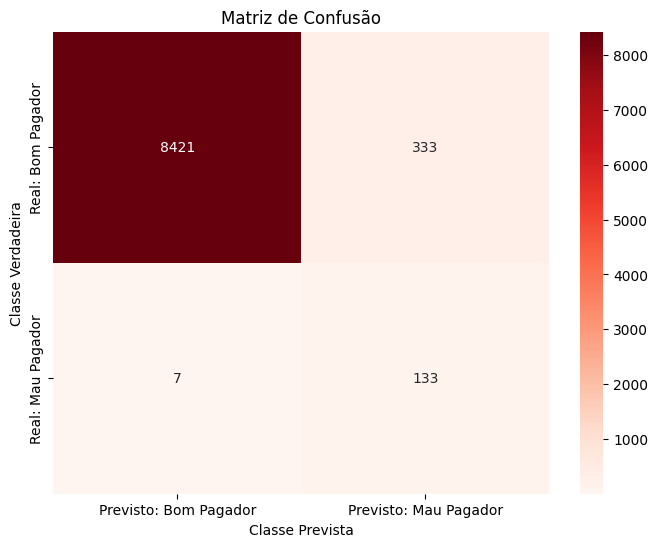

In [ ]:
# Inicializar e treinar o modelo de regressão logística com ajuste de pesos das classes
model = LogisticRegression(class_weight='balanced', max_iter=500)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Acurácia do modelo:", accuracy)
print("Relatório de classificação:\n", report)

# Calcular e exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Previsto: Bom Pagador', 'Previsto: Mau Pagador'], yticklabels=['Real: Bom Pagador', 'Real: Mau Pagador'])
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()


### **Oversampling**

Técnica de reamostragem no qual tem com propósito equilibrar a diferença de classes aumentando o número de instâncias da classe minoritária. Aqui utilizamos a classe SMOTE.

Acurácia do modelo: 0.962333099086437
Relatório de classificação:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      7002
           1       0.29      0.96      0.45       113

    accuracy                           0.96      7115
   macro avg       0.65      0.96      0.71      7115
weighted avg       0.99      0.96      0.97      7115



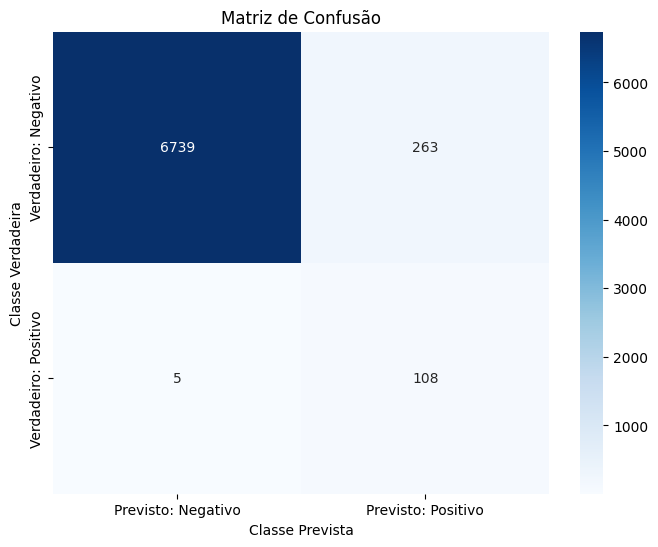

In [ ]:
#importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report

# Ensure 'default_flag' is of integer type
df['default_flag'] = df['default_flag'].astype(int)  # Convert to integer

# Selecionar as variáveis independentes e dependentes
X = df[['age', 'last_month', 'number_dependents', 'total_90_days_overdue', 'debt_ratio']]
y = df['default_flag']

# onvertendo x em float64
X = X.astype(np.float64)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balancear as classes no conjunto de treinamento usando SMOTE
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Escalar os dados
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Inicializar e treinar o modelo de regressão logística com ajuste de pesos das classes
model_over = LogisticRegression(max_iter=500)
model_over.fit(X_train_balanced, y_train_balanced)

# Fazer previsões
y_pred = model_over.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Acurácia do modelo:", accuracy)
print("Relatório de classificação:\n", report)


# Calcular e exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Previsto: Negativo', 'Previsto: Positivo'], yticklabels=['Verdadeiro: Negativo', 'Verdadeiro: Positivo'])
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

### **Undersampling**

Técnica de reamostragem no qual tem com propósito equilibrar essa diferença diminuindo o número de instâncias da classe majoritária.

In [ ]:
#importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler


# Selecionar as variáveis independentes e dependentes
X = df[['age', 'last_month', 'number_dependents', 'total_90_days_overdue', 'debt_ratio']]
y = df['default_flag']

In [ ]:
# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Undersampling:

In [ ]:
# Criar o undersampler
rus = RandomUnderSampler(random_state=42)

In [ ]:
# Aplicar o undersampling no conjunto de treinamento
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [ ]:
# Verificar a distribuição de classes após o undersampling
print("Distribuição de classes antes do undersampling:", y_train.value_counts())
print("Distribuição de classes após o undersampling:", y_train_res.value_counts())

Distribuição de classes antes do undersampling: default_flag
0    24448
1      454
Name: count, dtype: int64
Distribuição de classes após o undersampling: default_flag
0    454
1    454
Name: count, dtype: int64


In [ ]:
# Inicializar e treinar o modelo de regressão logística com ajuste de pesos das classes
model_under = LogisticRegression(max_iter=1000)
model_under.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000)

In [ ]:
# Fazer previsões
y_pred_under = model_under.predict(X_test)

Avaliando:

Acurácia do modelo: 0.9632718073643775
Relatório de classificação:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     10505
           1       0.29      0.93      0.44       168

    accuracy                           0.96     10673
   macro avg       0.65      0.95      0.71     10673
weighted avg       0.99      0.96      0.97     10673



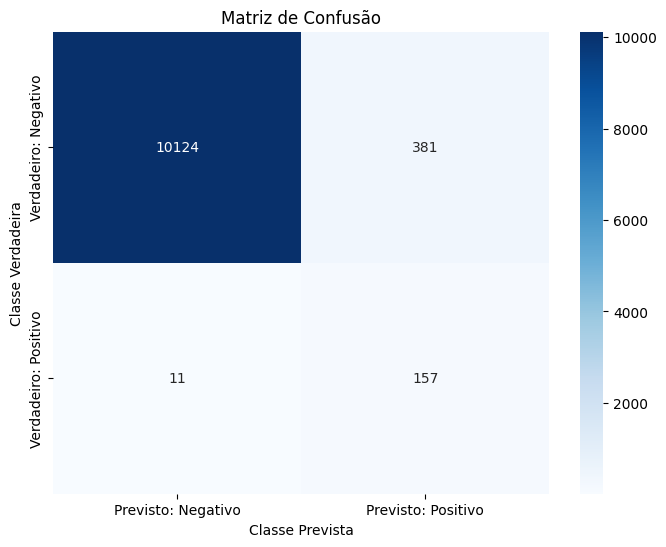

In [ ]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred_under)
report = classification_report(y_test, y_pred_under)

print("Acurácia do modelo:", accuracy)
print("Relatório de classificação:\n", report)


# Calcular e exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_under)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Previsto: Negativo', 'Previsto: Positivo'], yticklabels=['Verdadeiro: Negativo', 'Verdadeiro: Positivo'])
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

## **Regressão Logística - dados risk relative**

Aqui, utilizei os dados do Risco relativo para fazer a regressão logística:

In [ ]:
df4.info()

In [ ]:
#importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Selecionar as variáveis independentes e dependentes
X = df4[['age_relative_risk', 'last_month_relative_risk', 'number_dependents_relative_risk', 'total_90_days_overdue_relative_risk', 'debt_ratio_relative_risk', 'total_loan_relative_risk','total_lines_relative_risk']]
y = df['default_flag']

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Inicializar e treinar o modelo de regressão logística com ajuste de pesos das classes
model_risk = LogisticRegression(class_weight='balanced', max_iter=500)
model_risk.fit(X_train, y_train)

# Fazer previsões
y_pred = model_risk.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Acurácia do modelo:", accuracy)
print("Relatório de classificação:\n", report)

# Calcular e exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Previsto: Bom Pagador', 'Previsto: Mau Pagador'], yticklabels=['Real: Bom Pagador', 'Real: Mau Pagador'])
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

Pelo que dá para perceber, o modeloo utilizando valores do risco relativo apresentou métricas não muito boas.

## Gráficos

In [ ]:
#importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Combinar os DataFrames usando 'user_id' como chave
df_combined = pd.merge(df, df3[['user_id', 'risk_score']], on='user_id')

# Ensure 'default_flag' is of integer type
df_combined['default_flag'] = df_combined['default_flag'].astype(int)  # Convert to integer


# Selecionar as variáveis independentes e dependentes
X = df_combined[['age', 'last_month', 'number_dependents', 'total_90_days_overdue', 'debt_ratio', 'risk_score']]
y = df_combined['default_flag']

# Convertendo x em float64
X = X.astype(np.float64)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balancear as classes no conjunto de treinamento usando SMOTE
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Escalar os dados
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Inicializar e treinar o modelo de regressão logística com ajuste de pesos das classes
model = LogisticRegression(class_weight='balanced', max_iter=500)
model.fit(X_train_balanced, y_train_balanced)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Acurácia do modelo:", accuracy)
print("Relatório de classificação:\n", report)
print("ROC AUC:", roc_auc)

# Calcular e exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Previsto: Negativo', 'Previsto: Positivo'], yticklabels=['Verdadeiro: Negativo', 'Verdadeiro: Positivo'])
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

# Adicionar a classificação de bons e maus pagadores ao DataFrame original
df_combined['risk_class'] = np.where(df_combined['risk_score'] >= 5, 'Mau Pagador', 'Bom Pagador')

# Gráficos Bivariados
plt.figure(figsize=(12, 10))

# Age vs Risk Score
plt.subplot(2, 3, 1)
sns.boxplot(x='risk_class', y='age', data=df_combined)
plt.title('Age vs Risk Class')

# Last Month vs Risk Score
plt.subplot(2, 3, 2)
sns.boxplot(x='risk_class', y='last_month', data=df_combined)
plt.title('Last Month vs Risk Class')

# Number of Dependents vs Risk Score
plt.subplot(2, 3, 3)
sns.boxplot(x='risk_class', y='number_dependents', data=df_combined)
plt.title('Number of Dependents vs Risk Class')

# Total 90 Days Overdue vs Risk Score
plt.subplot(2, 3, 4)
sns.boxplot(x='risk_class', y='total_90_days_overdue', data=df_combined)
plt.title('Total 90 Days Overdue vs Risk Class')

# Debt Ratio vs Risk Score
plt.subplot(2, 3, 5)
sns.boxplot(x='risk_class', y='debt_ratio', data=df_combined)
plt.title('Debt Ratio vs Risk Class')

# Risk Score Distribution
plt.subplot(2, 3, 6)
sns.histplot(df_combined, x='risk_score', hue='risk_class', multiple='stack', kde=True)
plt.title('Risk Score Distribution')

plt.tight_layout()
plt.show()

# Visualização da taxa de inadimplência por pontuação de risco
risk_distribution = df_combined.groupby('risk_score')['default_flag'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='risk_score', y='default_flag', data=risk_distribution, marker='o')
plt.xlabel('Risk Score')
plt.ylabel('Default Rate')
plt.title('Default Rate by Risk Score')
plt.show()


# **Implementando o modelo**

Rodando o modelo com melhores parâmetros.
Esse é o primeiro modelo da seção **Regressão Logística**

Acurácia do modelo: 0.9617719811108613
Relatório de classificação:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      8754
           1       0.29      0.95      0.44       140

    accuracy                           0.96      8894
   macro avg       0.64      0.96      0.71      8894
weighted avg       0.99      0.96      0.97      8894



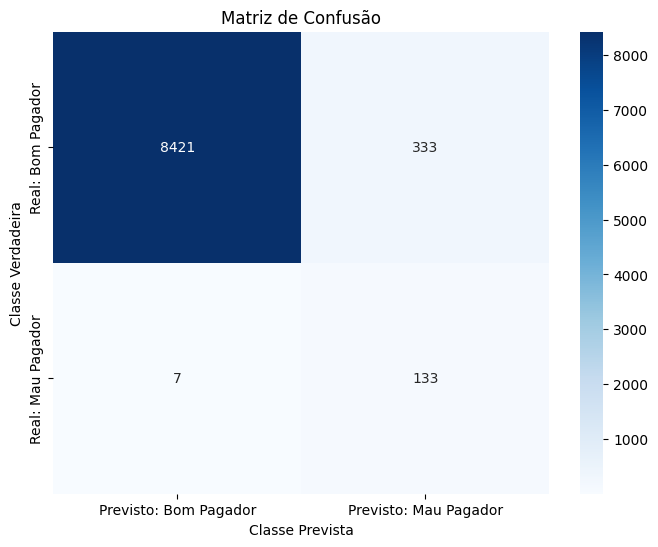

In [ ]:
#importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report

# Selecionar as variáveis independentes e dependentes
X = df[['age', 'last_month', 'number_dependents', 'total_90_days_overdue', 'debt_ratio', 'total_loan', 'total_lines']]
y = df['default_flag']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Inicializar e treinar o modelo de regressão logística com ajuste de pesos das classes
model = LogisticRegression(class_weight='balanced', max_iter=500)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Acurácia do modelo:", accuracy)
print("Relatório de classificação:\n", report)

# Calcular e exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Previsto: Bom Pagador', 'Previsto: Mau Pagador'], yticklabels=['Real: Bom Pagador', 'Real: Mau Pagador'])
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()


Salvando o modelo:

In [ ]:
import joblib

# Treine seu modelo (supondo que já tenha feito isso)
model.fit(X_train, y_train)

# Salve o modelo
joblib.dump(model, 'model.pkl')




['model.pkl']

In [ ]:
import pandas as pd
import joblib
import ipywidgets as widgets
from IPython.display import display

# Carregar o modelo salvo
model = joblib.load('model.pkl')

# Função para fazer a previsão
def classify_customer(age, last_month, number_dependents, total_loan, total_90_days_overdue, total_lines, debt_ratio):
    new_data = pd.DataFrame({
        'age': [age],
        'last_month': [last_month],
        'number_dependents': [number_dependents],
        'total_loan': [total_loan],
        'total_90_days_overdue': [total_90_days_overdue],
        'total_lines': [total_lines],
        'debt_ratio': [debt_ratio]
    })
    # Certificando de que as colunas estão na mesma ordem e têm os mesmos nomes que foram usadas durante o treinamento
    new_data = new_data[model.feature_names_in_]
    prediction = model.predict(new_data)
    result = "Risco de Inadimplência" if prediction[0] == 1 else "Sem Risco de Inadimplência"
    print(f"Previsão: {result}")

# Criar widgets
age = widgets.FloatText(description='Idade:', min=18, max=100, value=30)
last_month = widgets.FloatText(description='Último Salário:', min=1, max=100000, value=1)
number_dependents = widgets.FloatText(description='Dependentes:', min=0, max=10, value=2)
total_loan = widgets.FloatText(description='Total de Empréstimos:', value=5000)
total_90_days_overdue = widgets.FloatText(description='90+ Dias Atraso:', min=0, max=100, value=0)
total_lines = widgets.FloatText(description='Linhas Totais:', min=1, max=20, value=3)
debt_ratio = widgets.FloatText(description='Índice de Endividamento:', min=0.0, max=100.0, step=0.01, value=0.3)

# Botão para fazer a previsão
button = widgets.Button(description="Classificar Cliente")

# Chamar a função quando o botão é clicado
def on_button_clicked(b):
    classify_customer(age.value, last_month.value, number_dependents.value, total_loan.value, total_90_days_overdue.value, total_lines.value, debt_ratio.value)

button.on_click(on_button_clicked)

# Mostrar widgets
display(age, last_month, number_dependents, total_loan, total_90_days_overdue, total_lines, debt_ratio, button)

# Debug: Imprimir as colunas do conjunto de treinamento e as do new_data
#print(model.feature_names_in_)
new_data = pd.DataFrame({
    'age': [age.value],
    'last_month': [last_month.value],
    'number_dependents': [number_dependents.value],
    'total_loan': [total_loan.value],
    'total_90_days_overdue': [total_90_days_overdue.value],
    'total_lines': [total_lines.value],
    'debt_ratio': [debt_ratio.value]
})
#print(new_data.columns)

FloatText(value=30.0, description='Idade:')

FloatText(value=1.0, description='Último Salário:')

FloatText(value=2.0, description='Dependentes:')

FloatText(value=5000.0, description='Total de Empréstimos:')

FloatText(value=0.0, description='90+ Dias Atraso:')

FloatText(value=3.0, description='Linhas Totais:')

FloatText(value=0.3, description='Índice de Endividamento:', step=0.01)

Button(description='Classificar Cliente', style=ButtonStyle())

Previsão: Risco de Inadimplência
